In [1]:
import matplotlib.pyplot as plt
from igraph import load
import pandas as pd
import numpy as np
import glob

In [2]:
rows = []
paths = list(glob.glob('**/*.net'))
for path in paths:
    print(path)
    row = {}
    g = load(path)
    degrees = g.degree()    
    row["Number of nodes"] = g.vcount()
    row["Number of edges"] = g.ecount()    
    row["Minimum degree"] = min(degrees) 
    row["Maximum degree"] = max(degrees) 
    row["Average degree"] = sum(degrees)/len(degrees) 
    row["Average clustering coefficient"] = g.transitivity_avglocal_undirected() 
    row["Assortativity"] = g.assortativity_degree() 
    row["Average path length"] = g.average_path_length()
    row["Diameter"] = g.diameter()
    rows.append(row)
pd.DataFrame(rows, paths).round(4).to_csv('a.csv')

model\256_4_4_2_15_18_p.net
model\256_4_4_4_13_18_p.net
model\BA1000.net
model\ER1000k8.net
model\ER5000k8.net
model\homorand_N1000_K4_0.net
model\homorand_N1000_K6_0.net
model\rb125.net
model\SF_1000_g2.5.net
model\SF_1000_g2.7.net
model\SF_1000_g3.0.net
model\SF_500_g2.7.net
model\ws1000.net
model\ws2000.net
real\airports_UW.net
real\dolphins.net
real\PGP.net
real\zachary_unwh.net
toy\20x2+5x2.net
toy\circle9.net
toy\graph3+1+3.net
toy\graph4+4.net
toy\grid-p-6x6.net
toy\rb25.net
toy\star.net
toy\wheel.net


In [3]:
airportNames = ["PAR", "LON", "FRA", "AMS", "MOW", "CHI", "NYC", "ATL", "BCN", "WAW", "CHC", "DJE", "ADA", "AGU", "TBO", "ZVA"]
g = load("real/airports_UW.net")
centralities = g.eigenvector_centrality()
vs = g.vs(name_in=airportNames)
ids = [v["id"] for v in vs]
rows = []
for v in vs:
    print(v["id"])
    row = {}
    pathLens = [len(path) for path in v.get_shortest_paths()]  
    row["Degree"] = v.degree()
    row["Strength"] = v.strength(weights="weight")
    row["Clustering coefficient"] = g.transitivity_local_undirected(v)
    row["Average path length"] = sum(pathLens)/len(pathLens)
    row["Maximum path length"] = max(pathLens)
    row["Betweenness"] = v.betweenness()
    row["Eigenvector centrality"] = centralities[v.index]
    row["PageRank"] = v.pagerank()
    rows.append(row)
pd.DataFrame(rows, ids).round(8).to_csv('b.csv')

ADA
AGU
AMS
ATL
BCN
CHC
CHI
DJE
FRA
LON
MOW
NYC
PAR
TBO
WAW
ZVA


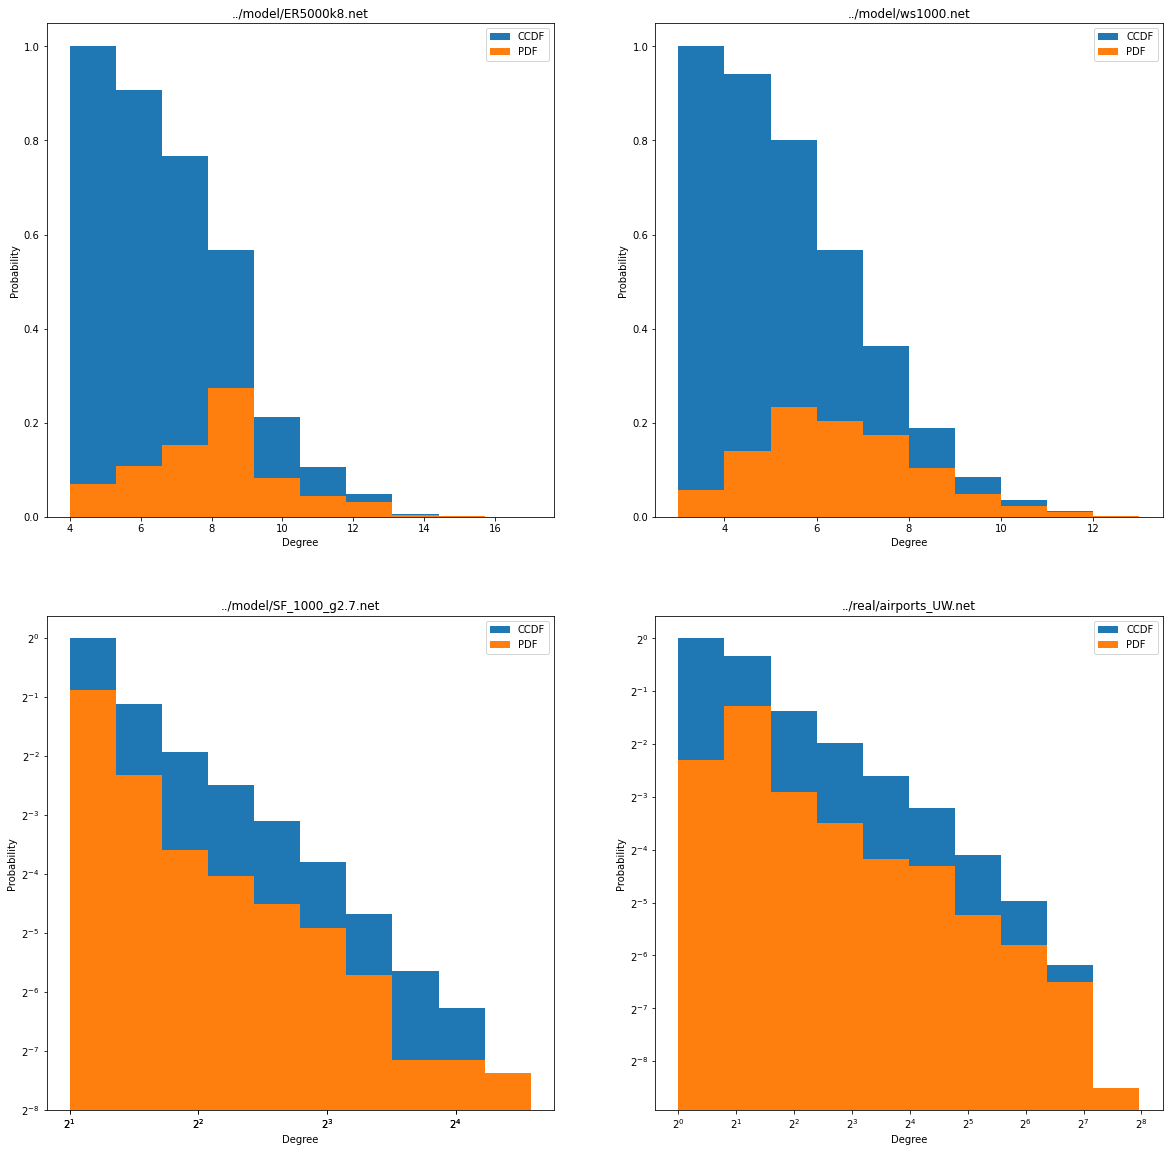

In [4]:
def parseFloat(number):
    return ('%f' % number).rstrip('0').rstrip('.')

fig, axs = plt.subplots(2, 2, figsize=(20, 20))
networks = [
    "../model/ER5000k8.net", 
    "../model/SF_1000_g2.7.net", 
    "../model/ws1000.net",
    "../real/airports_UW.net"
]
for i, network in enumerate(networks):
    ax = axs[i%2][i//2]
    g = load(network)
    degrees = g.degree()
    if network in ("../model/SF_1000_g2.7.net", "../real/airports_UW.net"):
        degrees = np.log2(degrees)
        ax.hist(degrees, cumulative=-1, label='CCDF', density=True)
        
        results, edges = np.histogram(degrees, density=True)
        binWidth = edges[1] - edges[0]
        ax.bar(edges[:-1], results*binWidth, binWidth, label='PDF', align='edge', color='C1')        
        
        xticks = [int(xtick) for xtick in ax.get_xticks()]
        ax.set_xticks(xticks[1:-1])
        
        labels = ["$2^{%s}$" % parseFloat(tick) for tick in xticks]
        ax.set_xticklabels(labels[1:-1])
        
        ax.set_yscale('log', base=2)
        ax.set_yticks([2**(-i) for i in range(9)])
    else:
        ax.hist(degrees, density=True, label='CCDF', cumulative=-1)
        ax.hist(degrees, density=True, label='PDF')
    
    ax.set_ylabel('Probability')
    ax.set_xlabel('Degree')
    ax.set_title(network)
    ax.legend()
plt.savefig('c.png')
plt.show()